# Coordinate Reference System
In this notebook we look at how to convert a geospatial dataset from using a spatial reference system to another one. 

In [8]:
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

We load a dataset of the borders of European countries that are represented as polygons in a unprojected spatial reference system using the WGS84 datum. The coordinates units are degrees (i.e. latitude and longitude). 

In [9]:
# Read the file
fp = 'data/vector/global/L2_data/Europe_borders.shp'
data = gpd.read_file(fp)
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can see the coordinates of the points of the polygons

In [10]:
data['geometry'].head()

0    POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1    POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2    POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3    POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4    POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
Name: geometry, dtype: geometry

Now we want to change the coordinate reference system from an unprojected one to a projected reference system using a different datum. GeoPandas provides a function to change the coordinate reference system that at the same time updates the coordinates of the points in the polygons according to the new reference system. We use the ETRS89-extended/LAEA Europe ([EPSG:3035](https://epsg.io/3035)).  

In [4]:
# Let's make a copy of our data
orig = data.copy()

# Reproject the data
data = data.to_crs(epsg=3035)

# Check the new geometry values
print(data['geometry'].head())

0    POLYGON ((4221214.558 3496203.404, 4220681.651...
1    POLYGON ((4224860.478 2732279.320, 4224932.819...
2    POLYGON ((4104652.176 3390034.953, 4104460.401...
3    POLYGON ((4113025.664 3391895.756, 4112879.943...
4    POLYGON ((4115871.228 3395282.099, 4114921.348...
Name: geometry, dtype: geometry


The datum of the new reference system is the European Terrestrial Reference System 1989 (ETRS89) and the projection is Lambert Azimuthal Equal Area. A Lambert projection preserves the areas.

In [5]:
data.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

We plot the dataframe with the original unprojected reference system and after the projection onto a 2D plane  

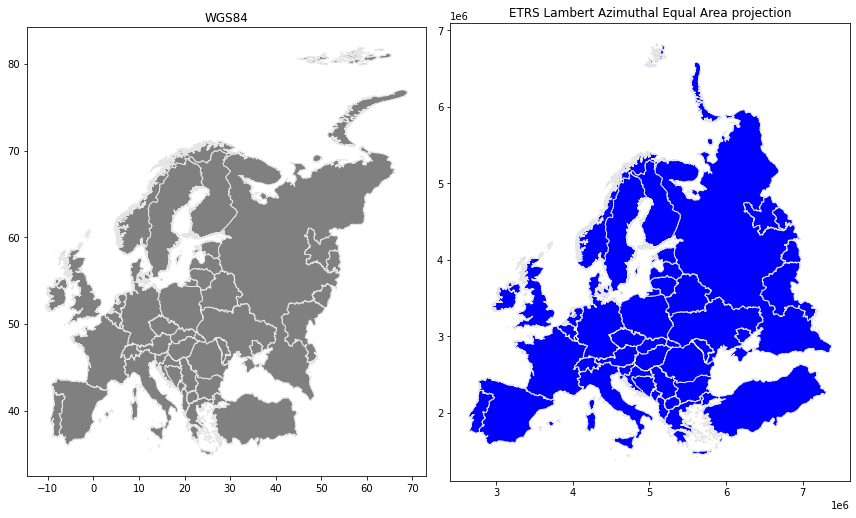

In [6]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
orig.plot(ax=ax1, facecolor='gray', edgecolor='0.9');

# Add title
ax1.set_title("WGS84");

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue', edgecolor='0.9');
edgecolor='0.9'
# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

In [7]:
# Ouput filepath
outfp = 'data/vector/global/L2_data/Europe_borders_epsg3035.shp'

# Save to disk
data.to_file(outfp)

## References
* [Tenkanen - Map projections](https://automating-gis-processes.github.io/CSC/notebooks/L2/projections.html)
* [Annoni et al. - Map Projections for Europe](http://mapref.org/LinkedDocuments/MapProjectionsForEurope-EUR-20120.pdf)